In [1]:
import glob
import numpy as np
import os
import shutil
np.random.seed(42)

In [2]:
files = glob.glob(r'D:\train\*')

In [3]:
len(files)

25000

In [4]:
cat_files = [fn for fn in files if 'cat' in fn]
dog_files = [fn for fn in files if 'dog' in fn]


In [5]:
len(cat_files) , len(dog_files)

(12500, 12500)

Let’s now build our smaller dataset, so that we have 3,000 images for training, 1,000 images for validation, and 1,000 images for our test dataset (with equal representation for the two animal categories)

In [6]:
cat_train = np.random.choice(cat_files, size=1500, replace=False)
dog_train = np.random.choice(dog_files, size=1500, replace=False)

In [7]:
len(cat_train), len(dog_train)

(1500, 1500)

In [8]:
cat_files = list(set(cat_files) - set(cat_train))
dog_files = list(set(dog_files) - set(dog_train))


In [9]:
len(cat_files), len(dog_files)

(11000, 11000)

In [10]:
cat_val = np.random.choice(cat_files, size=500, replace=False)
dog_val = np.random.choice(dog_files, size=500, replace=False)
cat_files = list(set(cat_files) - set(cat_val))
dog_files = list(set(dog_files) - set(dog_val))

In [11]:
len(cat_files), len(dog_files)

(10500, 10500)

In [12]:
cat_test = np.random.choice(cat_files, size=500, replace=False)
dog_test = np.random.choice(dog_files, size=500, replace=False)

In [13]:
print('Cat datasets:', cat_train.shape, cat_val.shape, cat_test.shape)
print('Dog datasets:', dog_train.shape, dog_val.shape, dog_test.shape)

Cat datasets: (1500,) (500,) (500,)
Dog datasets: (1500,) (500,) (500,)


In [29]:
train_dir = 'training_data'
val_dir = 'validation_data'
test_dir = 'test_data'

In [30]:
train_files = np.concatenate([cat_train, dog_train])
validate_files = np.concatenate([cat_val, dog_val])
test_files = np.concatenate([cat_test, dog_test])

In [31]:
os.mkdir(train_dir) if not os.path.isdir(train_dir) else None
os.mkdir(val_dir) if not os.path.isdir(val_dir) else None
os.mkdir(test_dir) if not os.path.isdir(test_dir) else None

In [32]:
for fn in train_files:
    shutil.copy(fn, train_dir)

for fn in validate_files:
    shutil.copy(fn, val_dir)
    
for fn in test_files:
    shutil.copy(fn, test_dir)

In [15]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
%matplotlib inline

Using TensorFlow backend.


In [16]:
IMG_DIM = (150, 150)
train_files = glob.glob(r'C:\Users\saish\Documents\Jupyter notebooks\training_data\*')
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)
train_labels = [fn.split('\\')[-1].split('.')[0].strip() for fn in train_files]


In [17]:
validation_files = glob.glob(r'C:\Users\saish\Documents\Jupyter notebooks\validation_data\*')
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs = np.array(validation_imgs)
validation_labels = [fn.split('\\')[-1].split('.')[0].strip() for fn in validation_files]

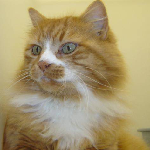

In [18]:
load_img(train_files[1], target_size=IMG_DIM)

In [19]:
print('Train dataset shape:', train_imgs.shape, 
      '\tValidation dataset shape:', validation_imgs.shape)

Train dataset shape: (3000, 150, 150, 3) 	Validation dataset shape: (1000, 150, 150, 3)


(150, 150, 3)


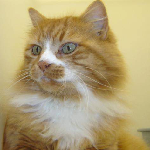

In [20]:
train_imgs_scaled = train_imgs.astype('float32')
validation_imgs_scaled  = validation_imgs.astype('float32')
train_imgs_scaled /= 255
validation_imgs_scaled /= 255

print(train_imgs[1].shape)
array_to_img(train_imgs[1])

In [21]:
train_imgs_scaled

array([[[[0.96862745, 0.9411765 , 0.83137256],
         [0.9647059 , 0.95686275, 0.8745098 ],
         [0.972549  , 0.9764706 , 0.9137255 ],
         ...,
         [0.19215687, 0.14509805, 0.09803922],
         [0.1882353 , 0.13333334, 0.09019608],
         [0.1882353 , 0.14901961, 0.14117648]],

        [[0.96862745, 0.9411765 , 0.8392157 ],
         [0.9529412 , 0.94509804, 0.8627451 ],
         [0.9764706 , 0.98039216, 0.91764706],
         ...,
         [0.1882353 , 0.15686275, 0.14509805],
         [0.17254902, 0.14117648, 0.13333334],
         [0.14509805, 0.14117648, 0.16078432]],

        [[0.95686275, 0.9254902 , 0.8352941 ],
         [0.95686275, 0.94509804, 0.87058824],
         [0.98039216, 0.9843137 , 0.92941177],
         ...,
         [0.20392157, 0.21176471, 0.2627451 ],
         [0.3137255 , 0.34117648, 0.4117647 ],
         [0.3019608 , 0.34509805, 0.41568628]],

        ...,

        [[0.7137255 , 0.63529414, 0.6       ],
         [0.7176471 , 0.63529414, 0.6156863 ]

In [22]:
batch_size = 30
num_classes = 2
epochs = 30
input_shape = (150, 150, 3)

In [23]:
# encode text category labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train_labels)
train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)

In [24]:
print(train_labels[1495:1505], train_labels_enc[1495:1505])


['cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'dog'] [0 0 0 0 0 1 1 1 1 1]


# Building Plain CNN model

In [73]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers

model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        9280      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36992)            

In [74]:
history = model.fit(x=train_imgs_scaled, y=train_labels_enc,
                    validation_data=(validation_imgs_scaled, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Train on 3000 samples, validate on 1000 samples
Epoch 1/30
3000/3000 [==============================] - 74s 25ms/step - loss: 1.1323 - accuracy: 0.5563 - val_loss: 0.6662 - val_accuracy: 0.5390
Epoch 2/30
3000/3000 [==============================] - 72s 24ms/step - loss: 0.6476 - accuracy: 0.6447 - val_loss: 0.7240 - val_accuracy: 0.5430
Epoch 3/30
3000/3000 [==============================] - 73s 24ms/step - loss: 0.5601 - accuracy: 0.7213 - val_loss: 0.5648 - val_accuracy: 0.7150
Epoch 4/30
3000/3000 [==============================] - 76s 25ms/step - loss: 0.4849 - accuracy: 0.7710 - val_loss: 0.5214 - val_accuracy: 0.7270
Epoch 5/30
3000/3000 [==============================] - 78s 26ms/step - loss: 0.3919 - accuracy: 0.8293 - val_loss: 0.5483 - val_accuracy: 0.7400
Epoch 6/30
3000/3000 [==============================] - 84s 28ms/step - loss: 0.2937 - accuracy: 0.8767 - val_loss: 0.6263 - val_accuracy: 0.7500
Epoch 7/30
3000/3000 [==============================] - 86s 29ms/step - loss

In [80]:
model.save("cats_dogs_basic_cnn.h5")


ValueError: x and y must have same first dimension, but have shapes (30,) and (100,)

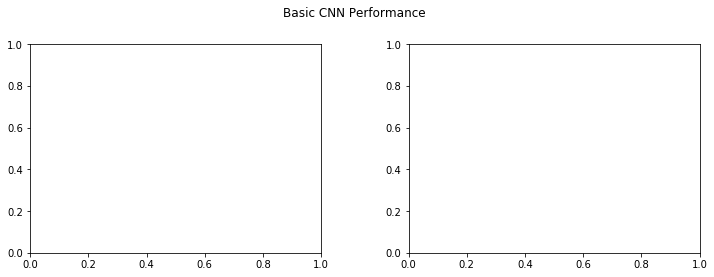

In [53]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

# CNN Model with Regularization


In [81]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])
              
              
history = model.fit(x=train_imgs_scaled, y=train_labels_enc,
                    validation_data=(validation_imgs_scaled, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Train on 3000 samples, validate on 1000 samples
Epoch 1/30
3000/3000 [==============================] - 68s 23ms/step - loss: 0.6948 - accuracy: 0.5330 - val_loss: 0.6536 - val_accuracy: 0.6280
Epoch 2/30
3000/3000 [==============================] - 60s 20ms/step - loss: 0.6683 - accuracy: 0.6160 - val_loss: 0.6142 - val_accuracy: 0.6810
Epoch 3/30
3000/3000 [==============================] - 63s 21ms/step - loss: 0.6327 - accuracy: 0.6497 - val_loss: 0.5679 - val_accuracy: 0.6890
Epoch 4/30
3000/3000 [==============================] - 59s 20ms/step - loss: 0.5913 - accuracy: 0.6760 - val_loss: 0.5699 - val_accuracy: 0.7330
Epoch 5/30
3000/3000 [==============================] - 62s 21ms/step - loss: 0.5565 - accuracy: 0.7047 - val_loss: 0.5651 - val_accuracy: 0.6940
Epoch 6/30
3000/3000 [==============================] - 63s 21ms/step - loss: 0.5283 - accuracy: 0.7537 - val_loss: 0.5064 - val_accuracy: 0.7540
Epoch 7/30
3000/3000 [==============================] - 63s 21ms/step - loss

In [82]:
 model.save('cats_dogs_basic_cnn_dropout.h5')

# CNN Model with Image Augmentation


In [25]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

In [41]:
img_id = 2595


In [42]:
dog_generator = train_datagen.flow(train_imgs[img_id:img_id+1], train_labels[img_id:img_id+1],
                                   batch_size=1)

Labels: ['dog', 'dog', 'dog', 'dog', 'dog']


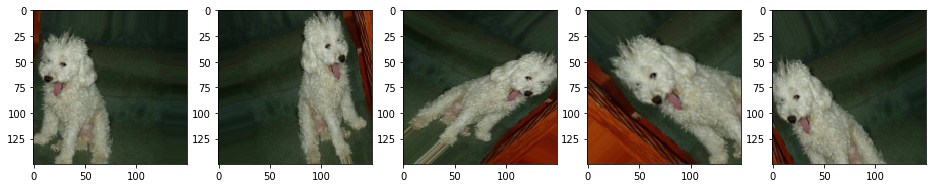

In [43]:
dog = [next(dog_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(16, 6))
print('Labels:', [item[1][0] for item in dog])
l = [ax[i].imshow(dog[i][0][0]) for i in range(0,5)]

Labels: ['cat', 'cat', 'cat', 'cat', 'cat']


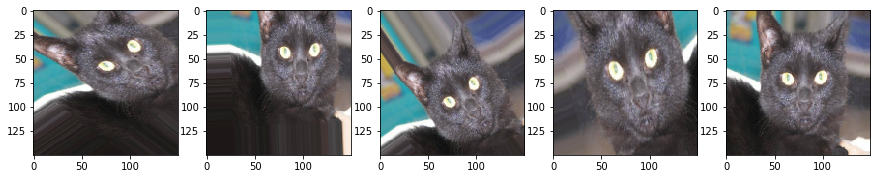

In [44]:
img_id = 1001
cat_generator = train_datagen.flow(train_imgs[img_id:img_id+1], train_labels[img_id:img_id+1],
                                   batch_size=1)
cat = [next(cat_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(15, 6))
print('Labels:', [item[1][0] for item in cat])
l = [ax[i].imshow(cat[i][0][0]) for i in range(0,5)]

In [45]:
train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)
input_shape = (150, 150, 3)

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers

model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])
              
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100,
                              validation_data=val_generator, validation_steps=50, 
                              verbose=1) 

Epoch 1/100
100/100 [==============================] - 83s 830ms/step - loss: 0.6926 - accuracy: 0.5143 - val_loss: 0.6933 - val_accuracy: 0.6090
Epoch 2/100
100/100 [==============================] - 82s 824ms/step - loss: 0.6896 - accuracy: 0.5420 - val_loss: 0.6735 - val_accuracy: 0.6680
Epoch 3/100
100/100 [==============================] - 83s 826ms/step - loss: 0.6720 - accuracy: 0.5803 - val_loss: 0.6178 - val_accuracy: 0.6770
Epoch 4/100
100/100 [==============================] - 81s 813ms/step - loss: 0.6544 - accuracy: 0.6130 - val_loss: 0.6940 - val_accuracy: 0.6070
Epoch 5/100
100/100 [==============================] - 82s 824ms/step - loss: 0.6425 - accuracy: 0.6223 - val_loss: 0.6437 - val_accuracy: 0.6820
Epoch 6/100
100/100 [==============================] - 83s 825ms/step - loss: 0.6283 - accuracy: 0.6490 - val_loss: 0.5358 - val_accuracy: 0.6600
Epoch 7/100
100/100 [==============================] - 82s 822ms/step - loss: 0.6210 - accuracy: 0.6583 - val_loss: 0.5771 -

Epoch 57/100
100/100 [==============================] - 62s 624ms/step - loss: 0.4498 - accuracy: 0.7890 - val_loss: 0.5305 - val_accuracy: 0.7840
Epoch 58/100
100/100 [==============================] - 62s 625ms/step - loss: 0.4413 - accuracy: 0.7843 - val_loss: 0.6614 - val_accuracy: 0.8230
Epoch 59/100
100/100 [==============================] - 62s 623ms/step - loss: 0.4457 - accuracy: 0.7887 - val_loss: 0.5459 - val_accuracy: 0.7500
Epoch 60/100
100/100 [==============================] - 63s 632ms/step - loss: 0.4474 - accuracy: 0.7840 - val_loss: 0.6039 - val_accuracy: 0.8120
Epoch 61/100
100/100 [==============================] - 217s 2s/step - loss: 0.4314 - accuracy: 0.8030 - val_loss: 0.5766 - val_accuracy: 0.8370
Epoch 62/100
100/100 [==============================] - 65s 647ms/step - loss: 0.4444 - accuracy: 0.7903 - val_loss: 0.2149 - val_accuracy: 0.8140
Epoch 63/100
100/100 [==============================] - 63s 632ms/step - loss: 0.4319 - accuracy: 0.8037 - val_loss: 0.2

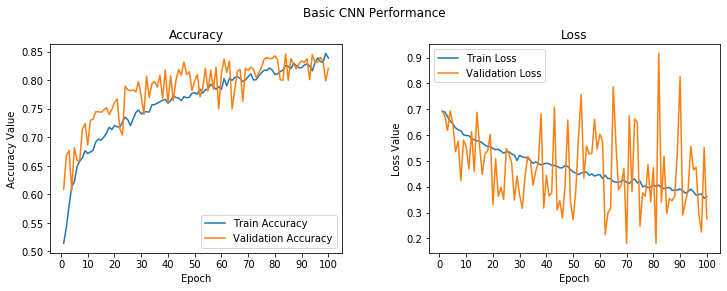

In [51]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,101))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 101, 10))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 101, 10))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [46]:
model.save("cats_dogs_cnn_dropout_img_aug.h5")
